In [18]:
import csv
import random
import collections
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [19]:
def load_csv(filepath):
    data = []
    with open(filepath) as csvfile:
        reader = csv.DictReader(csvfile, delimiter = ",")
        for row in reader:
            data.append(dict(row))
        return data

In [20]:
users = load_csv("data/users.csv")
print(users[0])

{'uid': '0', 'start_day': '35', 'location_x': '5.3401970378675765', 'location_y': '4.416271003073217', 'num_reviews': '295', 'r1_cnt': '29', 'r2_cnt': '74', 'r3_cnt': '119', 'r4_cnt': '54', 'r5_cnt': '19'}


In [21]:
ratings = load_csv("data/ratings_train.csv")
print(ratings[0])

{'uid': '1147', 'bid': '288', 'rating': '2'}


In [22]:
class Data:
    def __init__(self, data):
        self.data = data
        
    def convert_data_types(self, data, column_defs):
        result = []
        for row in data:
            new_values = {}
            for name, value in row.items():
                if name in column_defs and column_defs[name] == "float":
                    new_values[name] = float(value)
                elif name in column_defs and column_defs[name] == "integer":
                    new_values[name] = int(value)
                else:
                    new_values[name] = value
            result.append(new_values)
        
        return result
    
    def select_column(self, data, column_defs):
        result = []
        for row in data:
            filtered_values = {}
            for name, value in row.items():
                if name in column_defs:
                    filtered_values[name] = value
            result.append(filtered_values)
    
        return result
    
    def lab2_user_ratings_count_data(self):
        column_defs = {"uid": "integer", "num_reviews": "integer", "r1_cnt": "integer", "r2_cnt": "integer", "r3_cnt": "integer", "r4_cnt": "integer", "r5_cnt": "integer"}
        selected_data = self.select_column(self.data, column_defs)
        return self.convert_data_types(selected_data, column_defs)
    
    def lab2_ratings_data(self):
        column_defs = {"uid": "integer", "rating": "float"}
        selected_data = self.select_column(self.data, column_defs)
        return self.convert_data_types(selected_data, column_defs)

In [23]:
def scatter_plot(x_vals, y_vals, colors=None):
    fig = plt.figure(figsize=(20,8))
    ax = fig.add_subplot(1, 1, 1)
    ax.scatter(x_vals, y_vals, c=colors)
    ax.grid(True)
    return fig

In [24]:
users_data = Data(users)
user_features = users_data.lab2_user_ratings_count_data()
user_features_dict = {u["uid"]: u for u in user_features}
print(user_features[0])

ratings_data = Data(ratings)
rating_features = ratings_data.lab2_ratings_data()
print(rating_features[0])

{'uid': 0, 'num_reviews': 295, 'r1_cnt': 29, 'r2_cnt': 74, 'r3_cnt': 119, 'r4_cnt': 54, 'r5_cnt': 19}
{'uid': 1147, 'rating': 2.0}


In [25]:
#Extract user features
x_vals = []
y_vals = []
rmse = []
actual_predictions = {}
model_predictions = {}
for u in rating_features:
    actual_predictions[u["uid"]] = u["rating"]

for u in user_features:
    n = u["num_reviews"]
    counts = [u["r1_cnt"]/n, u["r2_cnt"]/n, u["r3_cnt"]/n, u["r4_cnt"]/n, u["r5_cnt"]/n]
    
    #feature1
    tail_sum = counts[0]+counts[4]
    mid_sum = counts[1] + counts[2] + counts[3]
    feature1 = mid_sum - tail_sum
    
    #feature2
    mean = (u["r1_cnt"]*1 + u["r2_cnt"] *2 + u["r3_cnt"] * 3 + u["r4_cnt"] * 4 + u["r5_cnt"] *5)/n
    max_count, mode = max([(val, idx+1) for idx, val in enumerate(counts)])
    feature2 = mode - mean
    
    x_vals.append(feature1)
    y_vals.append(feature2)
    
    model_predictions[u["uid"]] = mean
    

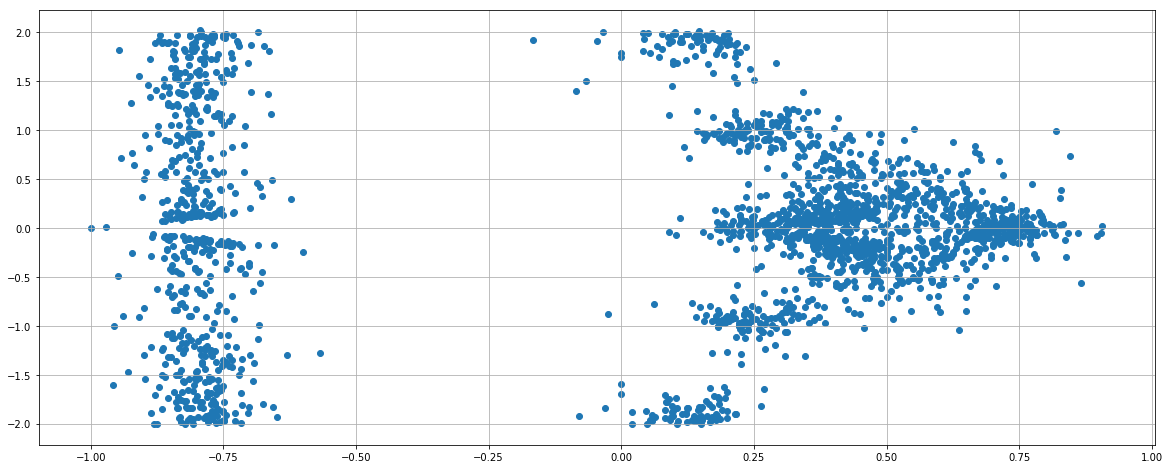

In [26]:
fig = scatter_plot(x_vals, y_vals)
plt.show()

#def prediction(user_features)
#1 get [num_review, r1~r5 count]
#2 get feature1: number(r2,r3,r4) - number(r1,r5)
#3 get feature2: mode - mean
#if feature1<-0.5:

#elif feature1 > 0.5:
#rating = mean

#else:
#rating = mode

#return (uid, rating)
#rmse 1.3

In [27]:
print(actual_predictions[0])
print(model_predictions[0])

3.0
2.864406779661017


In [28]:
# Assigns given number into a bin depeding on the num's value
#
# num: Float
# returns String
def evaluation_hist_bin(num):
    if num>=0 and num <1:
        bin_enum = "[0-1]"
    elif num>=1 and num < 2:
        bin_enum = "[1-2]"
    elif num>=2 and num <3:
        bin_enum = "[2-3]"
    elif num>=3 and num <4:
        bin_enum = "[3-4]"
    else:
        bin_enum = "[4+]"
    return bin_enum

# Calculates RMSE and error histogram from model and actual predictions
#
# model_prediction: Dict<string, float> ({user_id: predict_rating})
# actual_prediction: Dict<string, float> ({user_id: actual_rating})
def evaluate_predictions(model_predictions, actual_predictions):
    errors = []
    histogram = {}
    
    for key in model_predictions.keys():
        diff = abs(model_predictions[key] - actual_predictions[key])
        errors.append(diff**2)
        bin_id = evaluation_hist_bin(diff)
        
        if bin_id in histogram:
            histogram[bin_id] += 1
        else:
            histogram[bin_id] = 1
            
    mse = sum(errors) / len(errors)
    rmse = mse**0.5
    return rmse, histogram

In [32]:
rmse, histogram = evaluate_predictions(model_predictions, actual_predictions)
print(rmse)
histogram = dict(collections.OrderedDict(sorted(histogram.items())))
print(histogram)

1.3029584793324638
{'[0-1]': 1015, '[1-2]': 715, '[2-3]': 248, '[3-4]': 22}
